# Policy Iteration

## Background
Policy iteration is the process of iterating over all possible states and trying to improve the policy at the end of each pass through the states. For this we need to first evaluate (predict) the current level of policies and then update the policy if it is not good enough. This approach assumes that we know everything about the environment (not very realistic) and discrete (tabular) states.

### Policy Evaluation
For each state, we can use the Bellman Equation for iterative update of state values.  

<center>
$v_{k+1}(s) = \sum\limits_{a}\pi (a \mid s)\sum\limits_{s'}p(s',r\mid s,a)[r+\gamma v_k(s')]$
</center>  

This replaces the old values of $s$ with the new expected returns for all possible actions and successor sates of $s$.  We can repeat this until the change in values is smaller than a constant, i.e:
<center>
$\Delta = \max(\Delta, \mid v_{k+1}(s)-v_{k}(s)\mid)$  
$\Delta \stackrel{?}{<} \Theta$
</center>

### Policy Update
Now that we have the new state values, we can update the policy accordingly. We will use a very similar approach with one difference. Since policy is the probability of picking an action given a state, we want to update this probability according to the new values. Therefore, we will pick the maximum action that makes the value from the current state maximum. We can also do this iteretivaly as well.  

<center>
$\pi(s) = \underset{a}{\operatorname{argmax}}\sum\limits_{s'}p(s',r\mid s,a)[r+\gamma v_k(s')]$
</center>

### Combined
Rest is easy. Repeat Policy Evaluation + Policy Update until the policy won't change. It can be proven that the resulting policy and state values are actually $v^*$ and $\pi^*$.  

<center>
    $\pi_0\stackrel{E}{\rightarrow}v_1\stackrel{I}{\rightarrow}\pi_1\stackrel{E}{\rightarrow}...\stackrel{I}{\rightarrow}\pi^*\stackrel{E}{\rightarrow}v^*$
</center>
    

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from gym.envs.toy_text.frozen_lake import FrozenLakeEnv

From OpenAI GitHub Repo [here](https://github.com/openai/gym/blob/4c460ba6c8959dd8e0a03b13a1ca817da6d4074f/gym/envs/toy_text/discrete.py#L16)  
Discrete Environment Variables:
```python
- nS: number of states
- nA: number of actions
- P: transitions (*)
- isd: initial state distribution (**)
(*) dictionary dict of dicts of lists, where P[s][a] == [(probability, nextstate, reward, done), ...]
(**) list or array of length nS
```  

In [15]:
def init(env):
    """
    env: OpenAI Gym Environment
    """
    values = np.zeros(env.nS)
    policy = np.zeros((env.nS, env.nA))
    return values, policy

In [38]:
def policy_evaluation(env, values, policy, discount, theta):
    while True:
        delta = 0
        for s in range(env.nS): # For every state
            value = values[s]
            new_value = 0
            for a in range(env.nA): # For every action
                for transition, nextstate, reward, done in env.P[s][a]: # For every next state when action a is taken
                    transition *= policy[s][a] # Don't forget we need p(s',r|s,pi(s))
                    new_value += transition * (reward + discount * values[nextstate]) # Bellman optimality equation
            delta = max(delta, np.abs(value-new_value))
            values[s] = new_value
        if delta < theta:
            break
    return values

In [39]:
def policy_improvement(env, values, policy, discount):
    policy_stable = True
    for s in range(env.nS):
        old_action = np.argmax(policy[s])
        action_values = []
        for a in range(env.nA):
            action_value = 0
            for transition, nextstate, reward, done in env.P[s][a]:
                action_value += transition * (reward + discount * values[nextstate]) # Bellman optimality
            action_values.append(action_value)
        new_action = np.argmax(action_values) # Since we are dealing with policy take max action instead of summing them
        new_probs = np.zeros(env.nA)
        new_probs[new_action] += 1.0
        policy[s] = new_probs
        if old_action != new_action:
            policy_stable = False
    return policy_stable, policy

In [52]:
def policy_iteration(env, discount=0.9, theta=0.0001):
    policy_stable = False
    values, policy = init(env)
    while not policy_stable:
        values = policy_evaluation(env, values, policy, discount, theta)
        policy_stable, policy = policy_improvement(env, values, policy, discount)
    return policy

In [55]:
env = FrozenLakeEnv()
policy = policy_iteration(env)
done = False
state = env.reset()
env.render()
rewards = []
while not done:
    state, reward, done, _ = env.step(np.argmax(policy[state]))
    rewards.append(reward)
    env.render()


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG


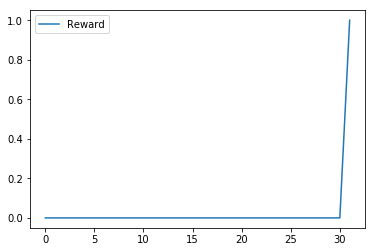

In [56]:
plt.plot(rewards, label="Reward")
plt.legend()